In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')
sns.set_palette("colorblind", n_colors=4)
sns.set_context('paper')
sns.despine()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.axes_style()

<Figure size 432x288 with 0 Axes>

# Visualize Towers of Hanoi Results

In [89]:
results_path_hanoi = "results/TOH/"

disk_4_q = pd.read_csv(results_path_hanoi + "5_RUNS_4_DISKS_Q-Learning_TOH.csv")
disk_4_imi = pd.read_csv(results_path_hanoi + "5_RUNS_4_DISKS_Imitation-SMDP-Q-Learning_TOH.csv")

disk_5_q = pd.read_csv(results_path_hanoi + "5_RUNS_5_DISKS_Q-Learning_TOH.csv")
disk_5_imi = pd.read_csv(results_path_hanoi + "5_RUNS_5_DISKS_Imitation-SMDP-Q-Learning_TOH.csv")
disk_5_trafo = pd.read_csv(results_path_hanoi + "5_RUNS_5_DISKS_Transfer-SMDP-Q-Learning_1_TOH.csv")

disk_6_q = pd.read_csv(results_path_hanoi + "5_RUNS_6_DISKS_Q-Learning_TOH.csv")
disk_6_imi = pd.read_csv(results_path_hanoi + "5_RUNS_6_DISKS_Imitation-SMDP-Q-Learning_TOH.csv")
disk_6_trafo_1 = pd.read_csv(results_path_hanoi + "5_RUNS_6_DISKS_Transfer-SMDP-Q-Learning_1_TOH.csv")
disk_6_trafo_2 = pd.read_csv(results_path_hanoi + "5_RUNS_6_DISKS_Transfer-SMDP-Q-Learning_2_TOH.csv")

disk_6_2seq = pd.read_csv(results_path_hanoi + "5_RUNS_6_DISKS_Imitation-SMDP-Q-Learning_TOH.csv")
disk_6_3seq = pd.read_csv(results_path_hanoi + "5_RUNS_6_DISKS_Imitation-SMDP-Q-Learning_3_seq_TOH.csv")
disk_6_glexis = pd.read_csv(results_path_hanoi + "5_RUNS_6_DISKS_Imitation-SMDP-Q-Learning_g_lexis_TOH.csv")

disk_5_imi.columns.values

array(['Unnamed: 0', 'index', 'opt_counter', 'rew_mean', 'rew_sd',
       'rew_median', 'rew_10th_p', 'rew_90th_p', 'steps_mean', 'steps_sd',
       'steps_median', 'steps_10th_p', 'steps_90th_p'], dtype=object)

In [90]:
def get_stats(df, max_t=None):
    # Get performance statistics from pandas dataframe
    if max_t is None:
        max_t = df.shape[0]
    its = df.loc[:max_t, "opt_counter"]
    rew_med = df.loc[:max_t, "rew_median"]
    rew_10p = df.loc[:max_t, "rew_10th_p"]
    rew_90p = df.loc[:max_t, "rew_90th_p"]
    return its, rew_med, rew_10p, rew_90p

In [200]:
def plot_results(its_list, rew_med_list, rew_10p_list, rew_90p_list,
                 ticks_spacing, labels_list, x_label, y_label, title,
                 save_fname=None, ylim=None, schedule=None):
    # Get x-ticks spaced into bins
    its_ticks = np.arange(ticks_spacing, np.max(its_list[0]), ticks_spacing)
    its_labels_temp = [str(int(it/ticks_spacing)) for it in its_ticks]
    its_labels = [it_l for it_l in its_labels_temp]
    its_labels[0] = r"$1$"
    
    # Plot the individual performance curves from the lists
    plt.plot(figsize=(15,15))
    for i in range(len(its_list)):
        rew_l = plt.plot(its_list[i], rew_med_list[i], label=labels_list[i])
        plt.fill_between(its_list[i], rew_10p_list[i], rew_90p_list[i], color=rew_l[0].get_color(), alpha=0.25)
    
    if y_label is not None:
        plt.ylabel(y_label, fontsize=18)
    plt.xlabel(x_label, fontsize=18)
    plt.legend(fontsize=12, loc=4)
    plt.title(title, fontsize=19)
    plt.xticks(its_ticks, its_labels, fontsize=12)
    plt.yticks(fontsize=12)

    if ylim is not None:
        plt.ylim(bottom=ylim)
        
    if schedule is not None:
        for x in schedule:
            plt.axvline(x=x, linewidth=2, color='r', linestyle="--", alpha=0.5)

    if save_fname is not None:
        #plt.tight_layout()
        plt.savefig(save_fname, dpi=300)
    return

In [98]:
its_imi_5, rew_med_imi_5, rew_10_imi_5, rew_90_imi_5 = get_stats(disk_5_imi, 1500)
its_trafo_5, rew_med_trafo_5, rew_10_trafo_5, rew_90_trafo_5 = get_stats(disk_5_trafo, 1500)
its_q_5, rew_med_q_5, rew_10_q_5, rew_90_q_5 = get_stats(disk_5_q, 1500)

In [99]:
its_imi_6, rew_med_imi_6, rew_10_imi_6, rew_90_imi_6 = get_stats(disk_6_imi, 6000)
its_trafo_1_6, rew_med_trafo_1_6, rew_10_trafo_1_6, rew_90_trafo_1_6 = get_stats(disk_6_trafo_1, 6000)
its_trafo_2_6, rew_med_trafo_2_6, rew_10_trafo_2_6, rew_90_trafo_2_6 = get_stats(disk_6_trafo_2, 6000)
its_q_6, rew_med_q_6, rew_10_q_6, rew_90_q_6 = get_stats(disk_6_q)

In [100]:
its_2seq_6, rew_med_2seq_6, rew_10_2seq_6, rew_90_2seq_6 = get_stats(disk_6_2seq, 3000)
its_3seq_6, rew_med_3seq_6, rew_10_3seq_6, rew_90_3seq_6 = get_stats(disk_6_3seq, 3000)
its_glexis_6, rew_med_glexis_6, rew_10_glexis_6, rew_90_glexis_6 = get_stats(disk_6_glexis, 3000)

# Figure 5 - left - 5 Disk ToH Q-Learn, Imitation/Expert, Transfer-1

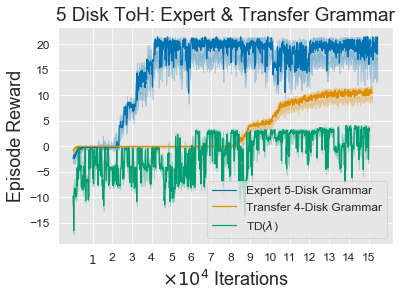

In [108]:
its_list = [its_imi_5, its_trafo_5, its_q_5]
rew_med_list = [rew_med_imi_5, rew_med_trafo_5, rew_med_q_5]
rew_10p_list = [rew_10_imi_5, rew_10_trafo_5, rew_10_q_5]
rew_90p_list = [rew_90_imi_5, rew_90_trafo_5, rew_90_q_5]
ticks_spacing = 10000
labels_list = ["Expert 5-Disk Grammar", "Transfer 4-Disk Grammar", r"TD($\lambda$)"]
x_label = r"$\times 10^4$ Iterations"
y_label = "Episode Reward"
title = "5 Disk ToH: Expert & Transfer Grammar"
save_fname = "figures/f5_left_hanoi_5_learning_curve.png"

plot_results(its_list, rew_med_list, rew_10p_list, rew_90p_list,
             ticks_spacing, labels_list, x_label, y_label, title, save_fname)

# Figure 5 - middle - 6 Disk ToH Q-Learn, Imitation/Expert, Transfer-1/-2

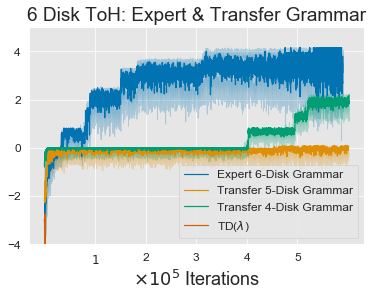

In [109]:
its_list = [its_imi_6, its_trafo_1_6, its_trafo_2_6, its_q_6]
rew_med_list = [rew_med_imi_6, rew_med_trafo_1_6, rew_med_trafo_2_6, rew_med_q_6]
rew_10p_list = [rew_10_imi_6, rew_10_trafo_1_6, rew_10_trafo_2_6, rew_10_q_6]
rew_90p_list = [rew_90_imi_6, rew_90_trafo_1_6, rew_90_trafo_2_6, rew_90_q_6]
ticks_spacing = 100000
labels_list = ["Expert 6-Disk Grammar", "Transfer 5-Disk Grammar", "Transfer 4-Disk Grammar", r"TD($\lambda$)"]
x_label = r"$\times 10^5$ Iterations"
y_label = None
title = "6 Disk ToH: Expert & Transfer Grammar"
save_fname = "figures/f5_middle_hanoi_6_learning_curve.png"

plot_results(its_list, rew_med_list, rew_10p_list, rew_90p_list,
             ticks_spacing, labels_list, x_label, y_label, title, save_fname, ylim=-4)

# Figure 5 - right - 6 Disk ToH Expert - 2-Seq/3-Seq/G-Lexis Grammar

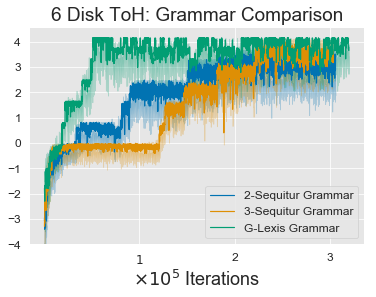

In [110]:
its_list = [its_2seq_6, its_3seq_6, its_glexis_6]
rew_med_list = [rew_med_2seq_6, rew_med_3seq_6, rew_med_glexis_6]
rew_10p_list = [rew_10_2seq_6, rew_10_3seq_6, rew_10_glexis_6]
rew_90p_list = [rew_90_2seq_6, rew_90_3seq_6, rew_90_glexis_6]
ticks_spacing = 100000
labels_list = ["2-Sequitur Grammar", "3-Sequitur Grammar", "G-Lexis Grammar"]
x_label = r"$\times 10^5$ Iterations"
y_label = None
title = "6 Disk ToH: Grammar Comparison"
save_fname = "figures/f5_right_hanoi_6_learning_curve.png"

plot_results(its_list, rew_med_list, rew_10p_list, rew_90p_list,
             ticks_spacing, labels_list, x_label, y_label, title, save_fname, ylim=-4)

# Plot 6 - left - Grid World - Expert Grammar

In [125]:
from scipy.interpolate import make_interp_spline, BSpline

def smooth(its, ts_med, ts_10p, ts_90p, T, k):
    its_n = np.linspace(its.min(), its.max(), T)
    spl_med = make_interp_spline(its, ts_med, k=k)
    smooth_med = spl_med(its_n)
    spl_10p = make_interp_spline(its, ts_10p, k=k)
    smooth_10p = spl_10p(its_n)
    spl_90p = make_interp_spline(its, ts_90p, k=k)
    smooth_90p = spl_med(its_n)
    return its_n, smooth_med, smooth_10p, smooth_90p

In [303]:
results_path_dqn = "results/OLD/GRIDWORLD/"
#results_path_dqn = "results/OLD/"

dqn = pd.read_csv(results_path_dqn + "5_RUNS_MLP-DQN_MLP_agent_stats.csv")
# dueling_dqn = pd.read_csv(results_path_dqn + "4_RUNS_MLP-Dueling-DQN_dueling_stats.csv")
dqn_g_expert_2macros = pd.read_csv(results_path_dqn + "5_RUNS_MLP-DQN_2_expert_grammar_stats_3000.csv")
dqn_g_expert_4macros = pd.read_csv(results_path_dqn + "5_RUNS_MLP-DQN_4_expert_grammar_stats_3000.csv")

dqn.columns.values

array(['Unnamed: 0', 'index', 'opt_counter', 'rew_mean', 'rew_sd',
       'rew_median', 'rew_10th_p', 'rew_90th_p', 'steps_mean', 'steps_sd',
       'steps_median', 'steps_10th_p', 'steps_90th_p'], dtype=object)

In [304]:
# dqn = pd.read_csv(results_path_dqn + "4_RUNS_MLP-DQN_dqn_stats.csv")
# dueling_dqn = pd.read_csv(results_path_dqn + "4_RUNS_MLP-Dueling-DQN_dueling_stats.csv")
# dqn_g_expert_2macros = pd.read_csv(results_path_dqn + "4_RUNS_MLP-DQN_grid_expert_1M.csv")
# dqn_g_expert_4macros = pd.read_csv(results_path_dqn + "4_RUNS_MLP-DQN_grid_expert_1M_4Macros.csv")

In [305]:
T_sub = 150
T = 200
k = 5

its_dqn, rew_med_dqn, rew_10_dqn, rew_90_dqn = smooth(*get_stats(dqn, T_sub), T, k)
#its_dueling_dqn, rew_med_dueling_dqn, rew_10_dueling_dqn, rew_90_dueling_dqn = smooth(*get_stats(dueling_dqn, T_sub), T, k)
its_dqn_g_expert_2macros, rew_med_dqn_g_expert_2macros, rew_10_dqn_g_expert_2macros, rew_90_dqn_g_expert_2macros = smooth(*get_stats(dqn_g_expert_2macros, T_sub), T, k)
its_dqn_g_expert_4macros, rew_med_dqn_g_expert_4macros, rew_10_dqn_g_expert_4macros, rew_90_dqn_g_expert_4macros = smooth(*get_stats(dqn_g_expert_4macros, T_sub), T, k)

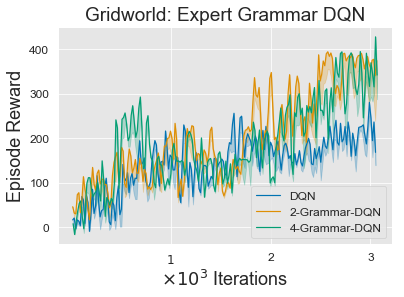

In [313]:
its_list = [its_dqn, its_dqn_g_expert_2macros, its_dqn_g_expert_4macros]
rew_med_list = [rew_med_dqn, rew_med_dqn_g_expert_2macros, rew_med_dqn_g_expert_4macros]
rew_10p_list = [rew_10_dqn, rew_10_dqn_g_expert_2macros, rew_10_dqn_g_expert_4macros]
rew_90p_list = [rew_90_dqn, rew_90_dqn_g_expert_2macros, rew_90_dqn_g_expert_4macros]
ticks_spacing = 1000
labels_list = ["DQN", "2-Grammar-DQN", "4-Grammar-DQN"]
x_label = r"$\times 10^3$ Iterations"
y_label = "Episode Reward"
title = "Gridworld: Expert Grammar DQN"
save_fname = "figures/f6_left_gridworld_expert.png"

plot_results(its_list, rew_med_list, rew_10p_list, rew_90p_list,
             ticks_spacing, labels_list, x_label, y_label, title, save_fname)

# Plot 6 - middle - Grid World - Transfer Grammar

In [307]:
# dqn_g_250_2macros = pd.read_csv(results_path_dqn + "4_RUNS_MLP-DQN_grid_transfer_250k.csv")
# dqn_g_500_2macros = pd.read_csv(results_path_dqn + "4_RUNS_MLP-DQN_grid_transfer_500k.csv")

dqn_g_250_2macros = pd.read_csv(results_path_dqn + "5_RUNS_MLP-DQN_2_expert_grammar_stats_25.csv")
dqn_g_500_2macros = pd.read_csv(results_path_dqn + "5_RUNS_MLP-DQN_2_expert_grammar_stats_75.csv")

In [308]:
its_dqn_g_250_2macros, rew_med_dqn_g_250_2macros, rew_10_dqn_g_250_2macros, rew_90_dqn_g_250_2macros = smooth(*get_stats(dqn_g_250_2macros, T_sub), T, k)
its_dqn_g_500_2macros, rew_med_dqn_g_500_2macros, rew_10_dqn_g_500_2macros, rew_90_dqn_g_500_2macros = smooth(*get_stats(dqn_g_500_2macros, T_sub), T, k)

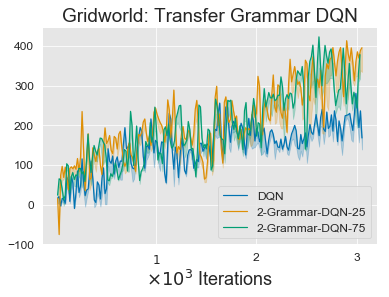

In [312]:
its_list = [its_dqn, its_dqn_g_250_2macros, its_dqn_g_500_2macros]
rew_med_list = [rew_med_dqn, rew_med_dqn_g_250_2macros, rew_med_dqn_g_500_2macros]
rew_10p_list = [rew_10_dqn, rew_10_dqn_g_250_2macros, rew_10_dqn_g_500_2macros]
rew_90p_list = [rew_90_dqn, rew_90_dqn_g_250_2macros, rew_90_dqn_g_500_2macros]
ticks_spacing = 1000
labels_list = ["DQN", "2-Grammar-DQN-25", "2-Grammar-DQN-75"]
x_label = r"$\times 10^3$ Iterations"
y_label = None
title = "Gridworld: Transfer Grammar DQN"
save_fname = "figures/f6_middle_gridworld_transfer.png"

plot_results(its_list, rew_med_list, rew_10p_list, rew_90p_list,
             ticks_spacing, labels_list, x_label, y_label, title, save_fname)

# Plot 6 - right - Pong - Expert Grammar

# Plot 7 - left - 5 Disks ToH - Online Grammar

In [205]:
schedule_towers_5_its = np.linspace(50000, 170000, 5)
disk_5_online_seq = pd.read_csv(results_path_hanoi + "5_RUNS_5_DISKS_Online-SMDP-Q-Learning_seq_TOH.csv")
its_online_seq_5, rew_med_online_seq_5, rew_10_online_seq_5, rew_90_online_seq_5 = get_stats(disk_5_online_seq, 2000)
its_q_5, rew_med_q_5, rew_10_q_5, rew_90_q_5 = get_stats(disk_5_q, 2000)

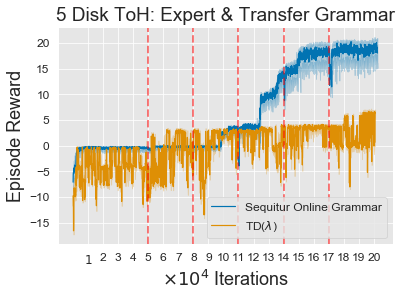

In [206]:
its_list = [its_online_seq_5, its_q_5]
rew_med_list = [rew_med_online_seq_5, rew_med_q_5]
rew_10p_list = [rew_10_online_seq_5, rew_10_q_5]
rew_90p_list = [rew_90_online_seq_5, rew_90_q_5]
ticks_spacing = 10000
labels_list = ["Sequitur Online Grammar", r"TD($\lambda$)"]
x_label = r"$\times 10^4$ Iterations"
y_label = "Episode Reward"
title = "5 Disk ToH: Expert & Transfer Grammar"
save_fname = "figures/f8_left_hanoi_5_online.png"

plot_results(its_list, rew_med_list, rew_10p_list, rew_90p_list,
             ticks_spacing, labels_list, x_label, y_label, title,
             save_fname, schedule=schedule_towers_5_its)

# Plot 7 - middle - 6 Disks ToH - Online Grammar

# Plot 7 - right - Gridworld - Online Grammar

In [ ]:
UPDATE_EVERY = 500
dqn_g_online = pd.read_csv(results_path_dqn + "5_RUNS_MLP-DQN_online_grammar_stats.csv")
num_logs=150
its_dqn_g_online = dqn_g_online.loc[:num_logs, "opt_counter"]
rew_med_dqn_g_online = dqn_g_online.loc[:num_logs, "rew_median"]
rew_10_dqn_g_online = dqn_g_online.loc[:num_logs, "rew_10th_p"]
rew_90_dqn_g_online = dqn_g_online.loc[:num_logs, "rew_90th_p"]

In [ ]:
its_dqn_g_online, rew_med_dqn_g_online, rew_10_dqn_g_online, rew_90_dqn_g_online = smooth(its_dqn_g_online, rew_med_dqn_g_online, rew_10_dqn_g_online,
                                                                                                                  rew_90_dqn_g_online, T, k)

update_ticks = np.arange(UPDATE_EVERY, np.max(its_dqn), UPDATE_EVERY)


In [ ]:
its_ticks = np.arange(1000, np.max(its_dqn), 1000)
its_labels_temp = [str(int(it/1000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
        
plt.plot(figsize=(15,15))
rew_1 = plt.plot(its_dqn_g_online, rew_med_dqn_g_online, label="Online-Grammar-DQN")
plt.fill_between(its_dqn_g_online, rew_10_dqn_g_online,
                 rew_90_dqn_g_online, color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(its_dqn, rew_med_dqn, label="DQN")
plt.fill_between(its_dqn, rew_10_dqn,
                 rew_90_dqn, color=rew_2[0].get_color(), alpha=0.25)

for xc in update_ticks:
    plt.axvline(x=xc, linewidth=2, color='r', linestyle="--", alpha=0.5)

# plt.ylabel("Episode Reward", fontsize=15)
plt.ylim(bottom=-10, top=410)
plt.xlabel(r"$\times 10^3$ Iterations", fontsize=15)
plt.legend(fontsize=10, loc=4)
plt.title("Online Grammar-DQN", fontsize=17)
plt.xticks(its_ticks, its_labels, fontsize=9)
#plt.tight_layout()
plt.savefig("figures/f7_left_grammar_dqn_gridworld_online.png", dpi=300)

# Plot 8 - right - Grammar Compression Performance

In [245]:
all_correct = []
for i in range(len(grammar_inferred_5)):
    no_correct = 0
    for j in range(len(grammar_inferred_5[i])):
        no_correct += grammar_inferred_5[i][j] in optimal_grammar_5
    all_correct.append(no_correct/len(optimal_grammar_5))

In [242]:
optimal_grammar_5_seq = ['bafbcd', 'ec', 'baf', 'bc']
grammar_inferred_5_seq = [['eb', 'fb', 'fd', 'ac', 'cb'],
                          ['ac', 'fd', 'eb', 'bc', 'be'],
                          ['fbc', 'cdb', 'fb'],
                          ['bafb', 'af', 'ec', 'cdb', 'cd'],
                          ['bafbcd', 'ec', 'baf', 'bc']]

'be', 'ac', 'bed', 'fe', 'fbc'
'ac', 'acac', 'beb', 'fbcac', 'bebeac'
'fd', 'fbcac', 'acac', 'acacac', 'fe'
'ca', 'cdb', 'cfb', 'afb', 'fe'
'bafbcdb', 'fec'


#no_correct = 
compression_stats = np.loadtxt(results_path_hanoi + "compression_seq_TOH.csv")

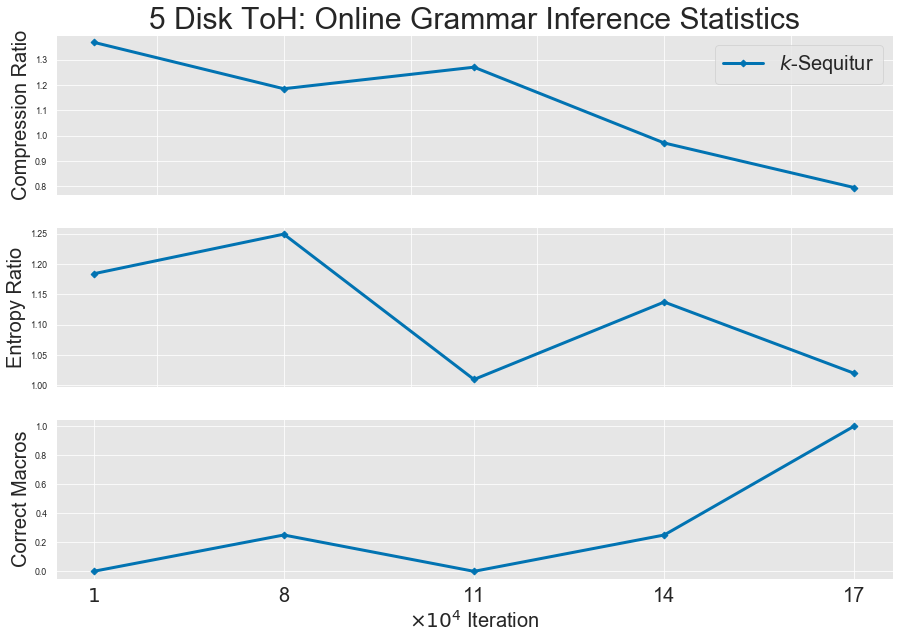

In [282]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.title("5 Disk ToH: Online Grammar Inference Statistics", fontsize=30)
plt.plot(schedule_towers_5_its, 1/compression_stats[:, 0], marker="D", label=r"$k$-Sequitur", linewidth=3)
plt.ylabel("Compression Ratio", fontsize=20)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(fontsize=20)
plt.subplot(3, 1, 2)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel("Entropy Ratio", fontsize=20)

plt.plot(schedule_towers_5_its, compression_stats[:, 2]/compression_stats[:, 1], marker="D", linewidth=3)

plt.subplot(3, 1, 3)
plt.ylabel("Correct Macros", fontsize=20)
plt.plot(schedule_towers_5_its, all_correct, marker="D", linewidth=3)

its_ticks = schedule_towers_5_its
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
plt.xticks(its_ticks, its_labels, fontsize=20)
plt.xlabel(r"$\times 10^4$ Iteration", fontsize=20)
plt.savefig("figures/f8_right_compression", dpi=300)

# RANDOM REST

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

its_n = np.linspace(its.min(),its.max(), 100)
spl = make_interp_spline(its, rew_med, k=3)
power_smooth = spl(its_n)

plt.plot(its_n, power_smooth)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

its_ticks_5 = np.arange(10000, np.max(its_imi_5), 10000)
its_labels_temp_5 = [str(int(it/10000)) for it in its_ticks_5]
its_labels_5 = [it_l for it_l in its_labels_temp_5]
its_labels_5[0] = r"$1$"
        
rew_1 = ax1.plot(its_imi_5, rew_med_imi_5, label="Expert 5-Disk Grammar")
ax1.fill_between(its_imi_5, rew_10_imi_5, rew_90_imi_5, color=rew_1[0].get_color(), alpha=0.5)
rew_2 = ax1.plot(its_trafo_5, rew_med_trafo_5, label="Transfer 4-Disk Grammar")
ax1.fill_between(its_trafo_5, rew_10_trafo_5, rew_90_trafo_5, color=rew_2[0].get_color(), alpha=0.5)

ax1.set_ylabel("Episode Reward", fontsize=15)
ax1.set_ylim(bottom=-2.5, top=22)
ax1.set_xlabel(r"$\times 10^4$ Iterations", fontsize=15)
ax1.legend(fontsize=10, loc=4)
ax1.set_title("5 Disk Towers of Hanoi", fontsize=17)
ax1.set_xticks(its_ticks_5)
ax1.set_xticklabels(its_labels_5)

its_ticks_6 = np.arange(10000, np.max(its_imi_5), 10000)
its_labels_temp_6 = [str(int(it/10000)) for it in its_ticks_6]
its_labels_6 = [it_l for it_l in its_labels_temp_6]
its_labels_6[0] = r"$1$"

rew_3 = ax2.plot(its_imi_5, rew_med_imi_5, label="Expert 5-Disk Grammar")
ax2.fill_between(its_imi_5, rew_10_imi_5, rew_90_imi_5, color=rew_3[0].get_color(), alpha=0.25)
rew_4 = ax2.plot(its_trafo_5, rew_med_trafo_5, label="Transfer 4-Disk Grammar")
ax2.fill_between(its_trafo_5, rew_10_trafo_5, rew_90_trafo_5, color=rew_4[0].get_color(), alpha=0.25)

ax2.set_ylim(bottom=-2.5, top=22)
ax2.set_xlabel(r"$\times 10^4$ Iterations", fontsize=15)
ax2.legend(fontsize=10, loc=4)
ax2.set_title("6 Disk Towers of Hanoi", fontsize=17)
ax2.set_xticks(its_ticks_6)
ax2.set_xticklabels(its_labels_6)

plt.tight_layout()
plt.savefig("figures/hanoi_learning_curve.png", dpi=300)

# Online 4 Disk Towers of Hanoi

In [ ]:
# Load in 4 disk results
its_imi_4, rew_med_imi_4, rew_10_imi_4, rew_90_imi_4 = get_stats(disk_4_imi, 1500)
its_q_4, rew_med_q_4, rew_10_q_4, rew_90_q_4 = get_stats(disk_4_q, 1500)

its_ticks = np.arange(10000, np.max(its_q_4), 10000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
        
plt.plot(figsize=(15,15))
rew_1 = plt.plot(its_imi_4, rew_med_imi_4, label="Expert 4-Disk Grammar")
plt.fill_between(its_imi_4, rew_10_imi_4, rew_90_imi_4, color=rew_1[0].get_color(), alpha=0.25)

# rew_2 = plt.plot(its_online_4, rew_med_online_4, label="Online Inferred Grammar")
# plt.fill_between(its_online_4, rew_10_online_4, rew_90_online_4, color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(its_q_4, rew_med_q_4, label=r"TD($\lambda$)")
plt.fill_between(its_q_4, rew_10_q_4, rew_90_q_4, color=rew_3[0].get_color(), alpha=0.25)

plt.ylabel("Episode Reward", fontsize=15)
#plt.ylim(bottom=-10, top=450)
plt.xlabel(r"$\times 10^4$ Iterations", fontsize=15)
plt.legend(fontsize=10, loc=4)
plt.title("Online: 4 Disks ToH", fontsize=17)
plt.xticks(its_ticks, its_labels, fontsize=9)
#plt.tight_layout()
plt.savefig("figures/hanoi_4_learning_curve.png", dpi=300)

# Hyperparameter k-Sequitur Schedule

In [283]:
# Plot Grammar Inference Schedule
schedule_towers_5_its = np.linspace(50000, 170000, 5)
schedule_towers_5_k = [5, 4, 3, 2, 2]

schedule_towers_6_its = np.linspace(100000, 600000, 10)
schedule_towers_6_k = [7, 6, 5, 4, 3, 2, 2, 2, 2, 2]

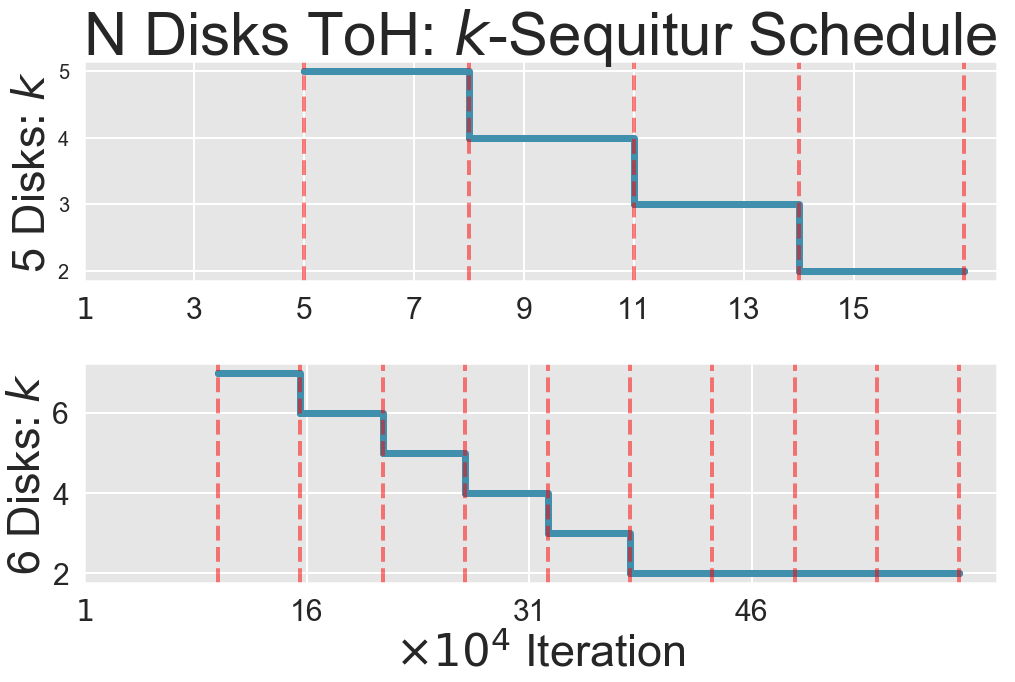

In [353]:
sns.set_palette("GnBu_d", n_colors=4)
sns.set_context('poster')

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.title(r"N Disks ToH: $k$-Sequitur Schedule", fontsize=60)
plt.plot(schedule_towers_5_its, schedule_towers_5_k, ".", linewidth=7.0)
plt.step(schedule_towers_5_its, schedule_towers_5_k, "-", where="post", linewidth=7.0)
#plt.xlabel("Iteration", fontsize=15)
plt.ylabel(r"5 Disks: $k$", fontsize=45)

for x in schedule_towers_5_its:
    plt.axvline(x=x, linewidth=4, color='r', linestyle="--", alpha=0.5)

its_ticks = np.arange(10000, np.max(schedule_towers_5_its), 20000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
plt.xticks(its_ticks, its_labels, fontsize=30)
plt.yticks(fontsize=20)

plt.subplot(2,1,2)
# plt.title(r"6 Disks ToH: $k$-Sequitur Schedule", fontsize=17)
plt.plot(schedule_towers_6_its, schedule_towers_6_k, ".", linewidth=7.0)
plt.step(schedule_towers_6_its, schedule_towers_6_k, "-", where="post", linewidth=7.0)
plt.xlabel(r"$\times 10^4$ Iteration", fontsize=45)
plt.ylabel(r"6 Disks: $k$", fontsize=45)

for x in schedule_towers_6_its:
    plt.axvline(x=x, linewidth=4, color='r', linestyle="--", alpha=0.5)

its_ticks = np.arange(10000, np.max(schedule_towers_6_its), 150000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
plt.xticks(its_ticks, its_labels, fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.savefig("figures/f4_right_sequitur_schedule", dpi=300)

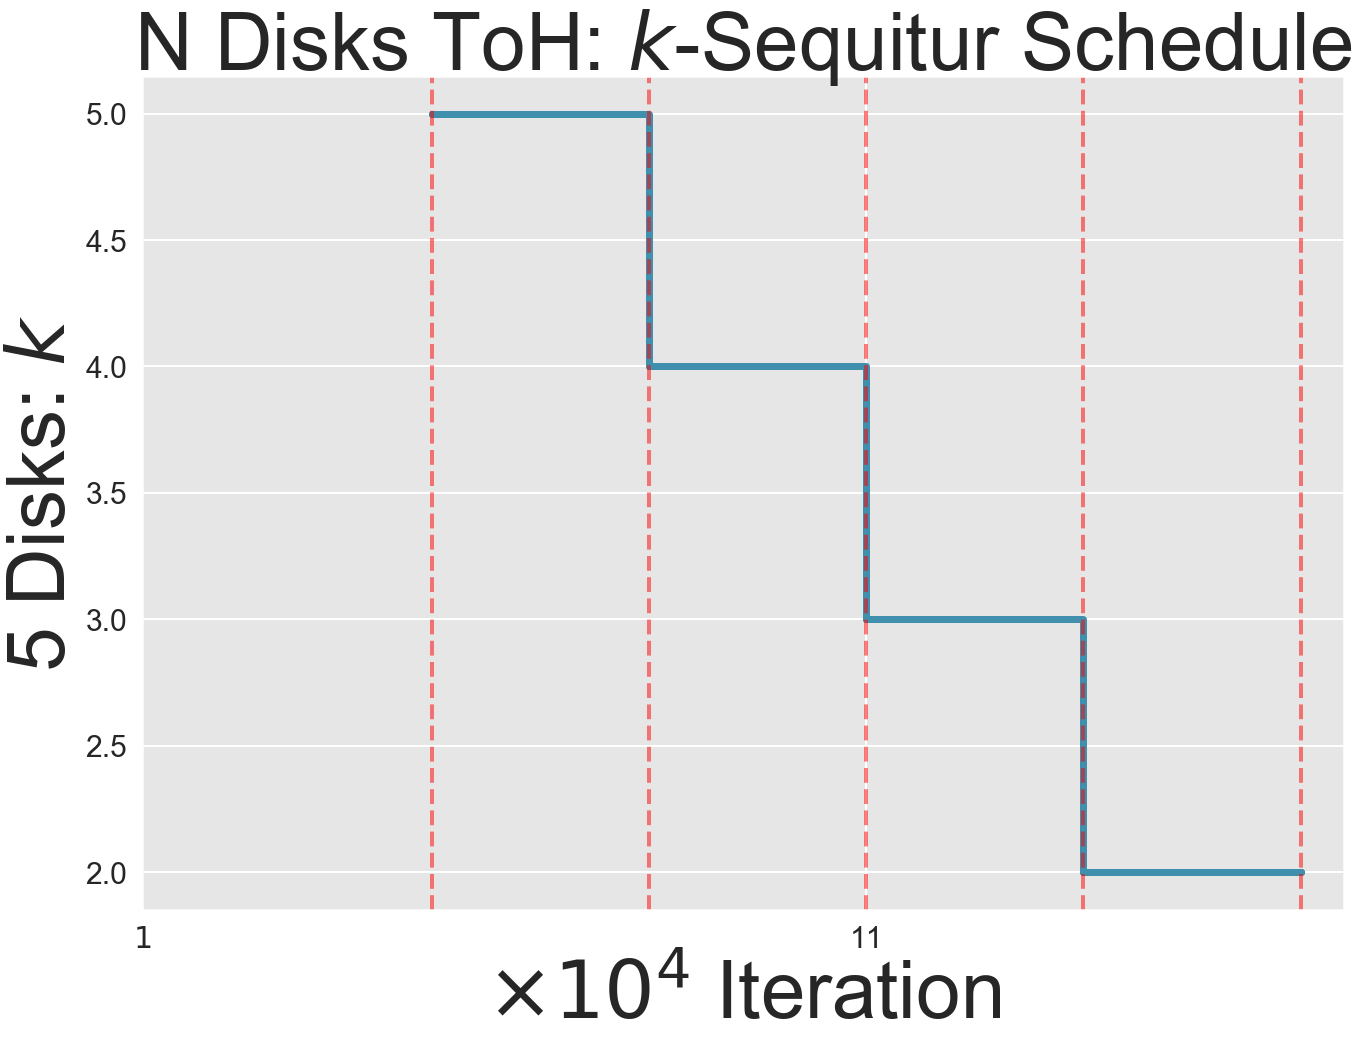

In [354]:
plt.figure(figsize=(20, 15))
plt.title(r"N Disks ToH: $k$-Sequitur Schedule", fontsize=80)

plt.plot(schedule_towers_5_its, schedule_towers_5_k, ".", linewidth=7.0)
plt.step(schedule_towers_5_its, schedule_towers_5_k, "-", where="post", linewidth=7.0)
plt.xlabel(r"$\times 10^4$ Iteration", fontsize=80)
plt.ylabel(r"5 Disks: $k$", fontsize=80)

for x in schedule_towers_5_its:
    plt.axvline(x=x, linewidth=4, color='r', linestyle="--", alpha=0.5)

its_ticks = np.arange(10000, np.max(schedule_towers_5_its), 100000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
plt.xticks(its_ticks, its_labels, fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.savefig("figures/poster_sequitur_schedule", dpi=300)